In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_row", 500)

In [49]:
def plot_scores(score_df, metric, score_type, title="", save_folder="", col_order=None, hue_order=None):

    g = sns.catplot(x="Domain", y="Score", hue="alpha", col="Data mul factor", col_order=col_order,
                    row="% Data", data=score_df, ci="sd", kind="bar", hue_order=hue_order,
                    row_order=[100.0, 80.0, 60.0, 40.0, 20.0])

    g.set_axis_labels("", "Score (Mean and Standard Deviation across 5 CV folds)")

    for i, ax in enumerate(g.fig.axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
        ax.axhline(0, color="black")

    g.fig.suptitle(title, y=1.08, fontsize=30)
    
    if score_type == "Out-of-sample":
        for i, ax in enumerate(g.fig.axes):
            ax.axhline(0.5, color="black")
            ax.axhline(0.6, color="black")
#         g.set(ylim=(-1, 0.2))
#         plt.savefig(save_folder + title, bbox_inches="tight")
#         pass
        
    if metric == "R2" and (score_type == "In-sample" or score_type == "In-sample (original)"):
        g.set(ylim=(-0.05, 1.0))
        
    if metric == "MAE":
        g.set(ylim=(0.0, 1.6))
        
    plt.show()
#     plt.savefig(save_folder + title, bbox_inches="tight")


def plot_all_scores(score_df, title_prefix="", save_folder="", col_order=None, hue_order=None):   

    for metric in score_df["Metric"].unique():

        for score_type in score_df["Score type"].unique():
            
            for model in score_df["Model"].unique():

                filtered_data = score_df[(score_df["Metric"] == metric) & (score_df["Score type"] == score_type) 
                                         & (score_df["Model"] == model)]

                title = title_prefix + metric + " - " + score_type + " - " + model

                plot_scores(filtered_data, metric, score_type, title, save_folder, col_order=col_order, hue_order=hue_order)

In [9]:
# utility to load results
def load_dfs(direc, regex):
    path = "/Users/hasnainmamdani/Academics/McGill/thesis/stroke-impairment-analysis/classification/results_remote/" + direc
    filenames = glob.glob(os.path.join(path, regex))
    filenames.sort()

    res = []
    bps = []
    for fn in filenames:
        if "best-params-" in fn:
            bp = pd.read_hdf(fn, key='p', mode='r')
            print(bp["% Data"].unique(), bp["Data mul factor"].unique(), bp["alpha"].unique())
            bps.append(bp)
        else:
            res.append(pd.read_hdf(fn, key='p', mode='r'))

    print(len(res), len(bps))
    return res, bps

## 1- Logistic Regression

In [49]:
# ridge = pd.read_hdf('results/singleoutput/atlas-llm-mixup-after-log/results_atlas_llm_singleoutput_mixup_after_log_ridge_all.h5', key='p', mode='r')
# bpridge = pd.read_hdf('results/singleoutput/atlas-llm-mixup-after-log/best_params_atlas_llm_singleoutput_mixup_after_log_ridge_all.h5', key='p', mode='r')

ridge.to_hdf('results/singleoutput/atlas-llm-mixup-after-log/results_atlas_llm_singleoutput_mixup_after_log_ridge_all.h5', key='p', mode='w')
bpridge.to_hdf('results/singleoutput/atlas-llm-mixup-after-log/best_params_atlas_llm_singleoutput_mixup_after_log_ridge_all.h5', key='p', mode='w')

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:2368: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['Data mul factor', 'Domain', 'Metric', 'Model', 'Score type', 'alpha']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:2368: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['Best params', 'Data mul factor', 'Domain', 'Model', 'alpha']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [10]:
ridgelist, bpridgelist = load_dfs("class/", "*logit*")

[60.] ['No mixup' '5x' '10x' '50x'] ['No mixup' 0.01 0.1]
[80.] ['No mixup' '5x' '10x' '50x'] ['No mixup' 0.01 0.1]
[100.] ['No mixup' '5x' '10x' '50x'] ['No mixup' 0.01 0.1]
[60.] ['5x' '10x' '50x'] [0.3 1. ]
[80.] ['5x' '10x' '50x'] [0.3 1. ]
[100.] ['5x' '10x' '50x'] [0.3 1. ]
[20.] ['No mixup' '5x' '10x' '50x'] ['No mixup' 0.01 0.1 0.3 1.0]
[40.] ['No mixup' '5x' '10x' '50x'] ['No mixup' 0.01 0.1 0.3 1.0]
8 8


In [21]:
# bpridgelist[7]

In [44]:
t = 5

print(ridgelist[t]["% Data (train)"].unique(), ridgelist[t]["Data mul factor"].unique(), ridgelist[t]["alpha"].unique())
print(bpridgelist[t]["% Data (train)"].unique(), bpridgelist[t]["Data mul factor"].unique(), bpridgelist[t]["alpha"].unique())

[20.] ['5x' '10x'] [0.01 0.1  0.3  1.  ]
[80.] ['No mixup'] ['No mixup']


In [22]:
logit = pd.concat(ridgelist, ignore_index=True)
blogit = pd.concat(bpridgelist, ignore_index=True)

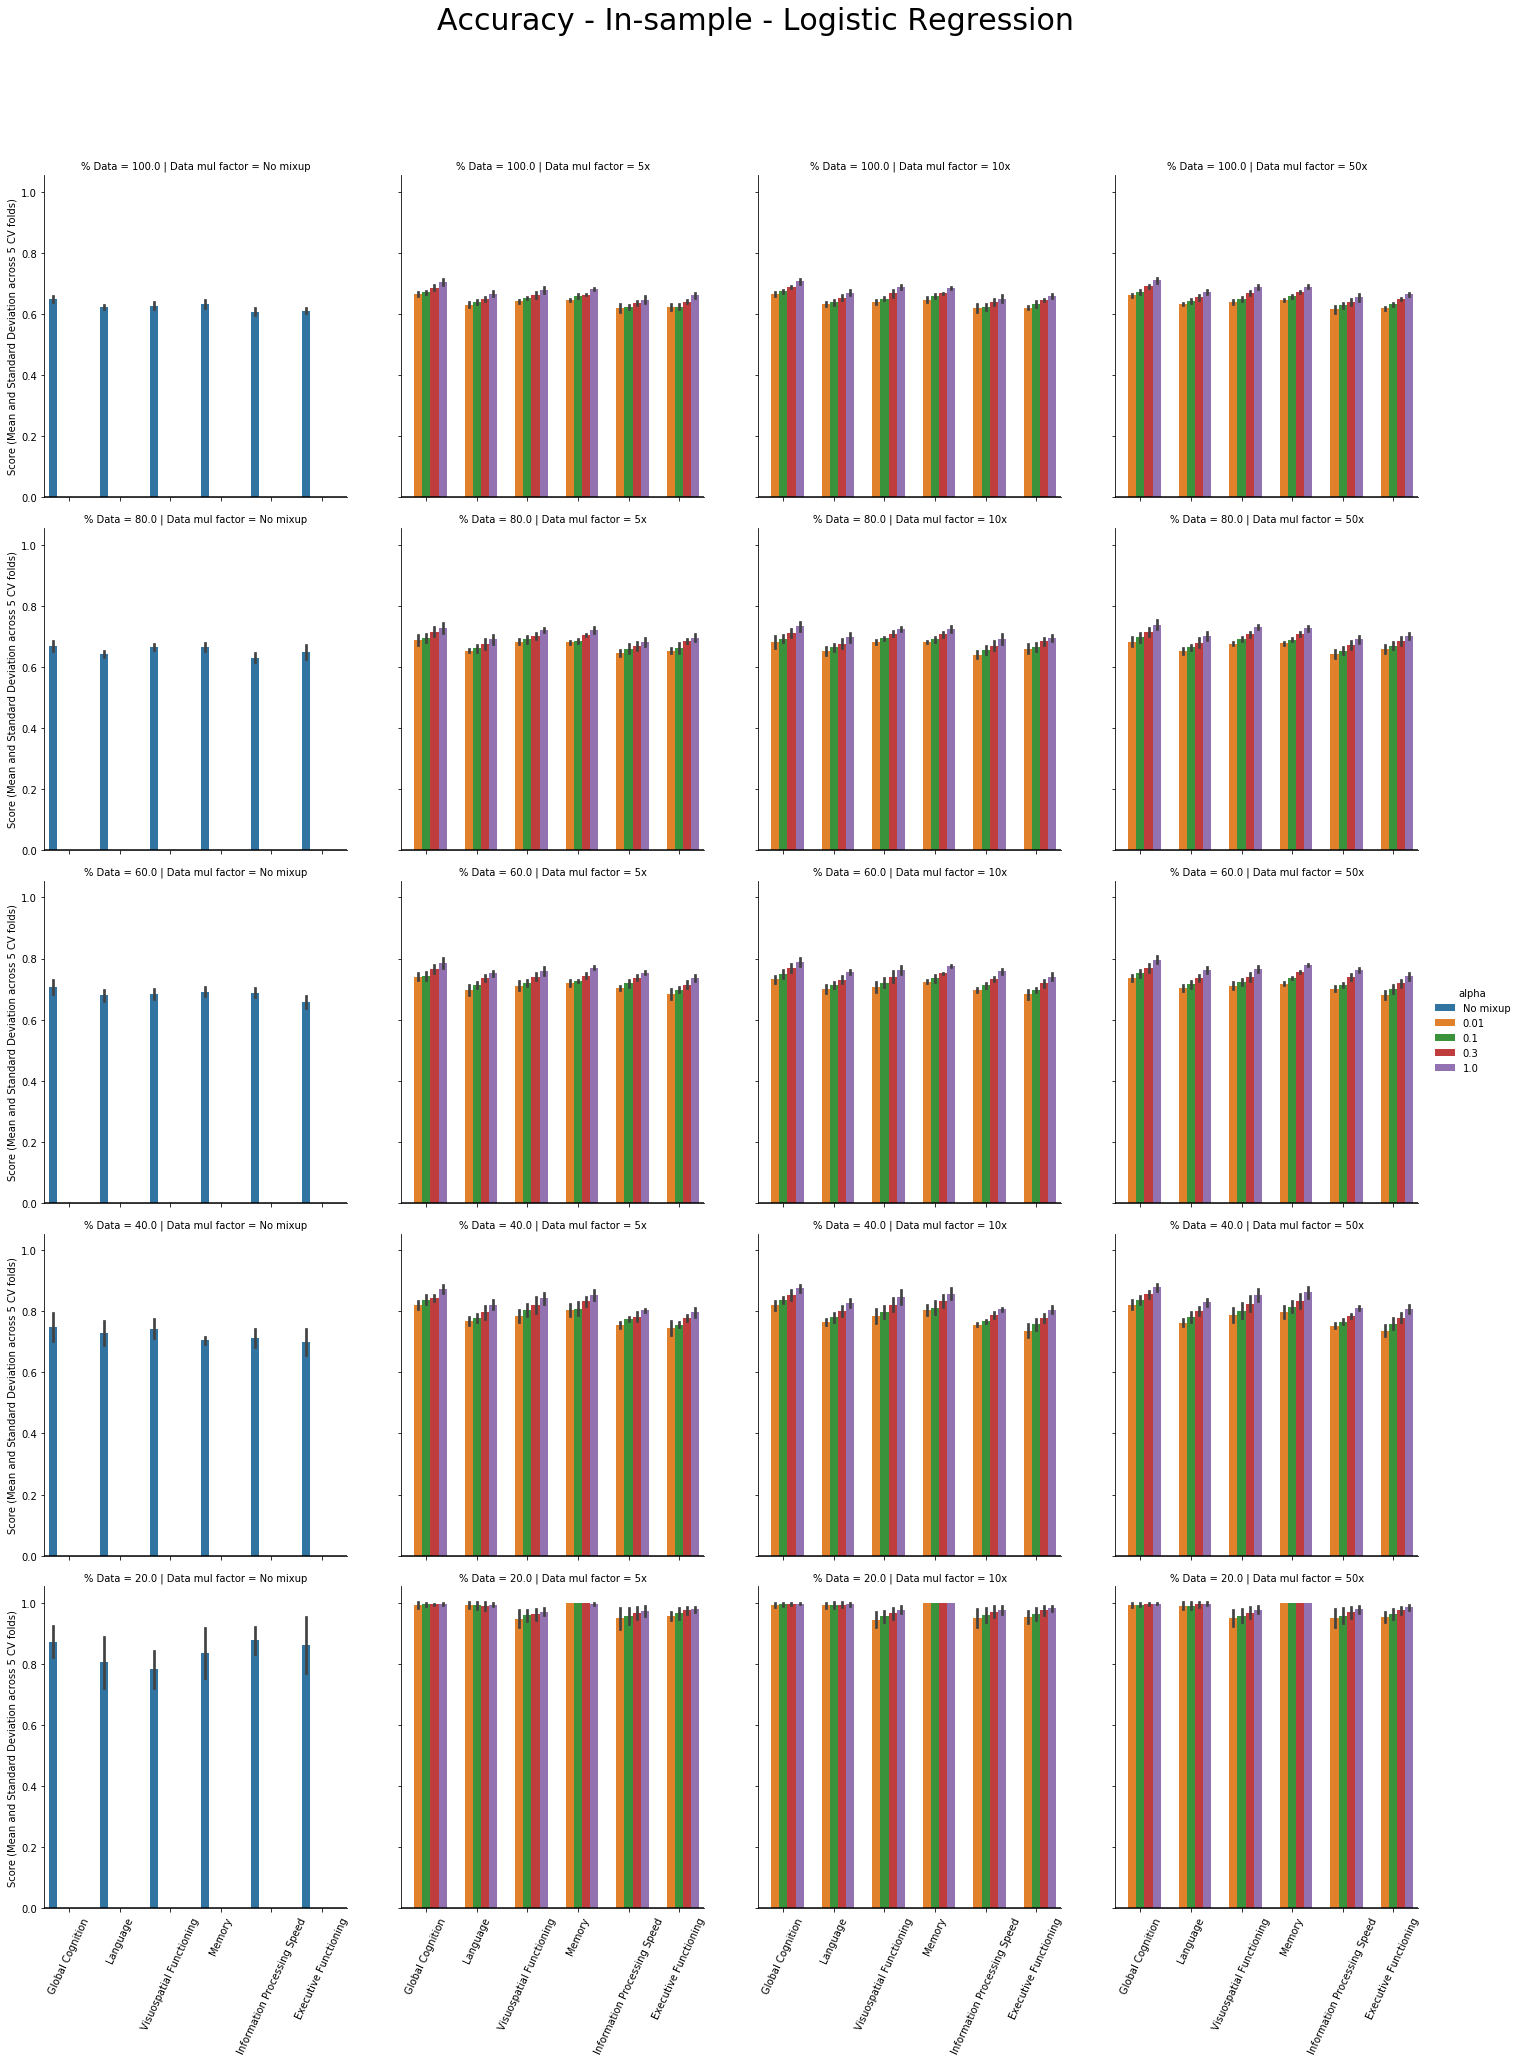

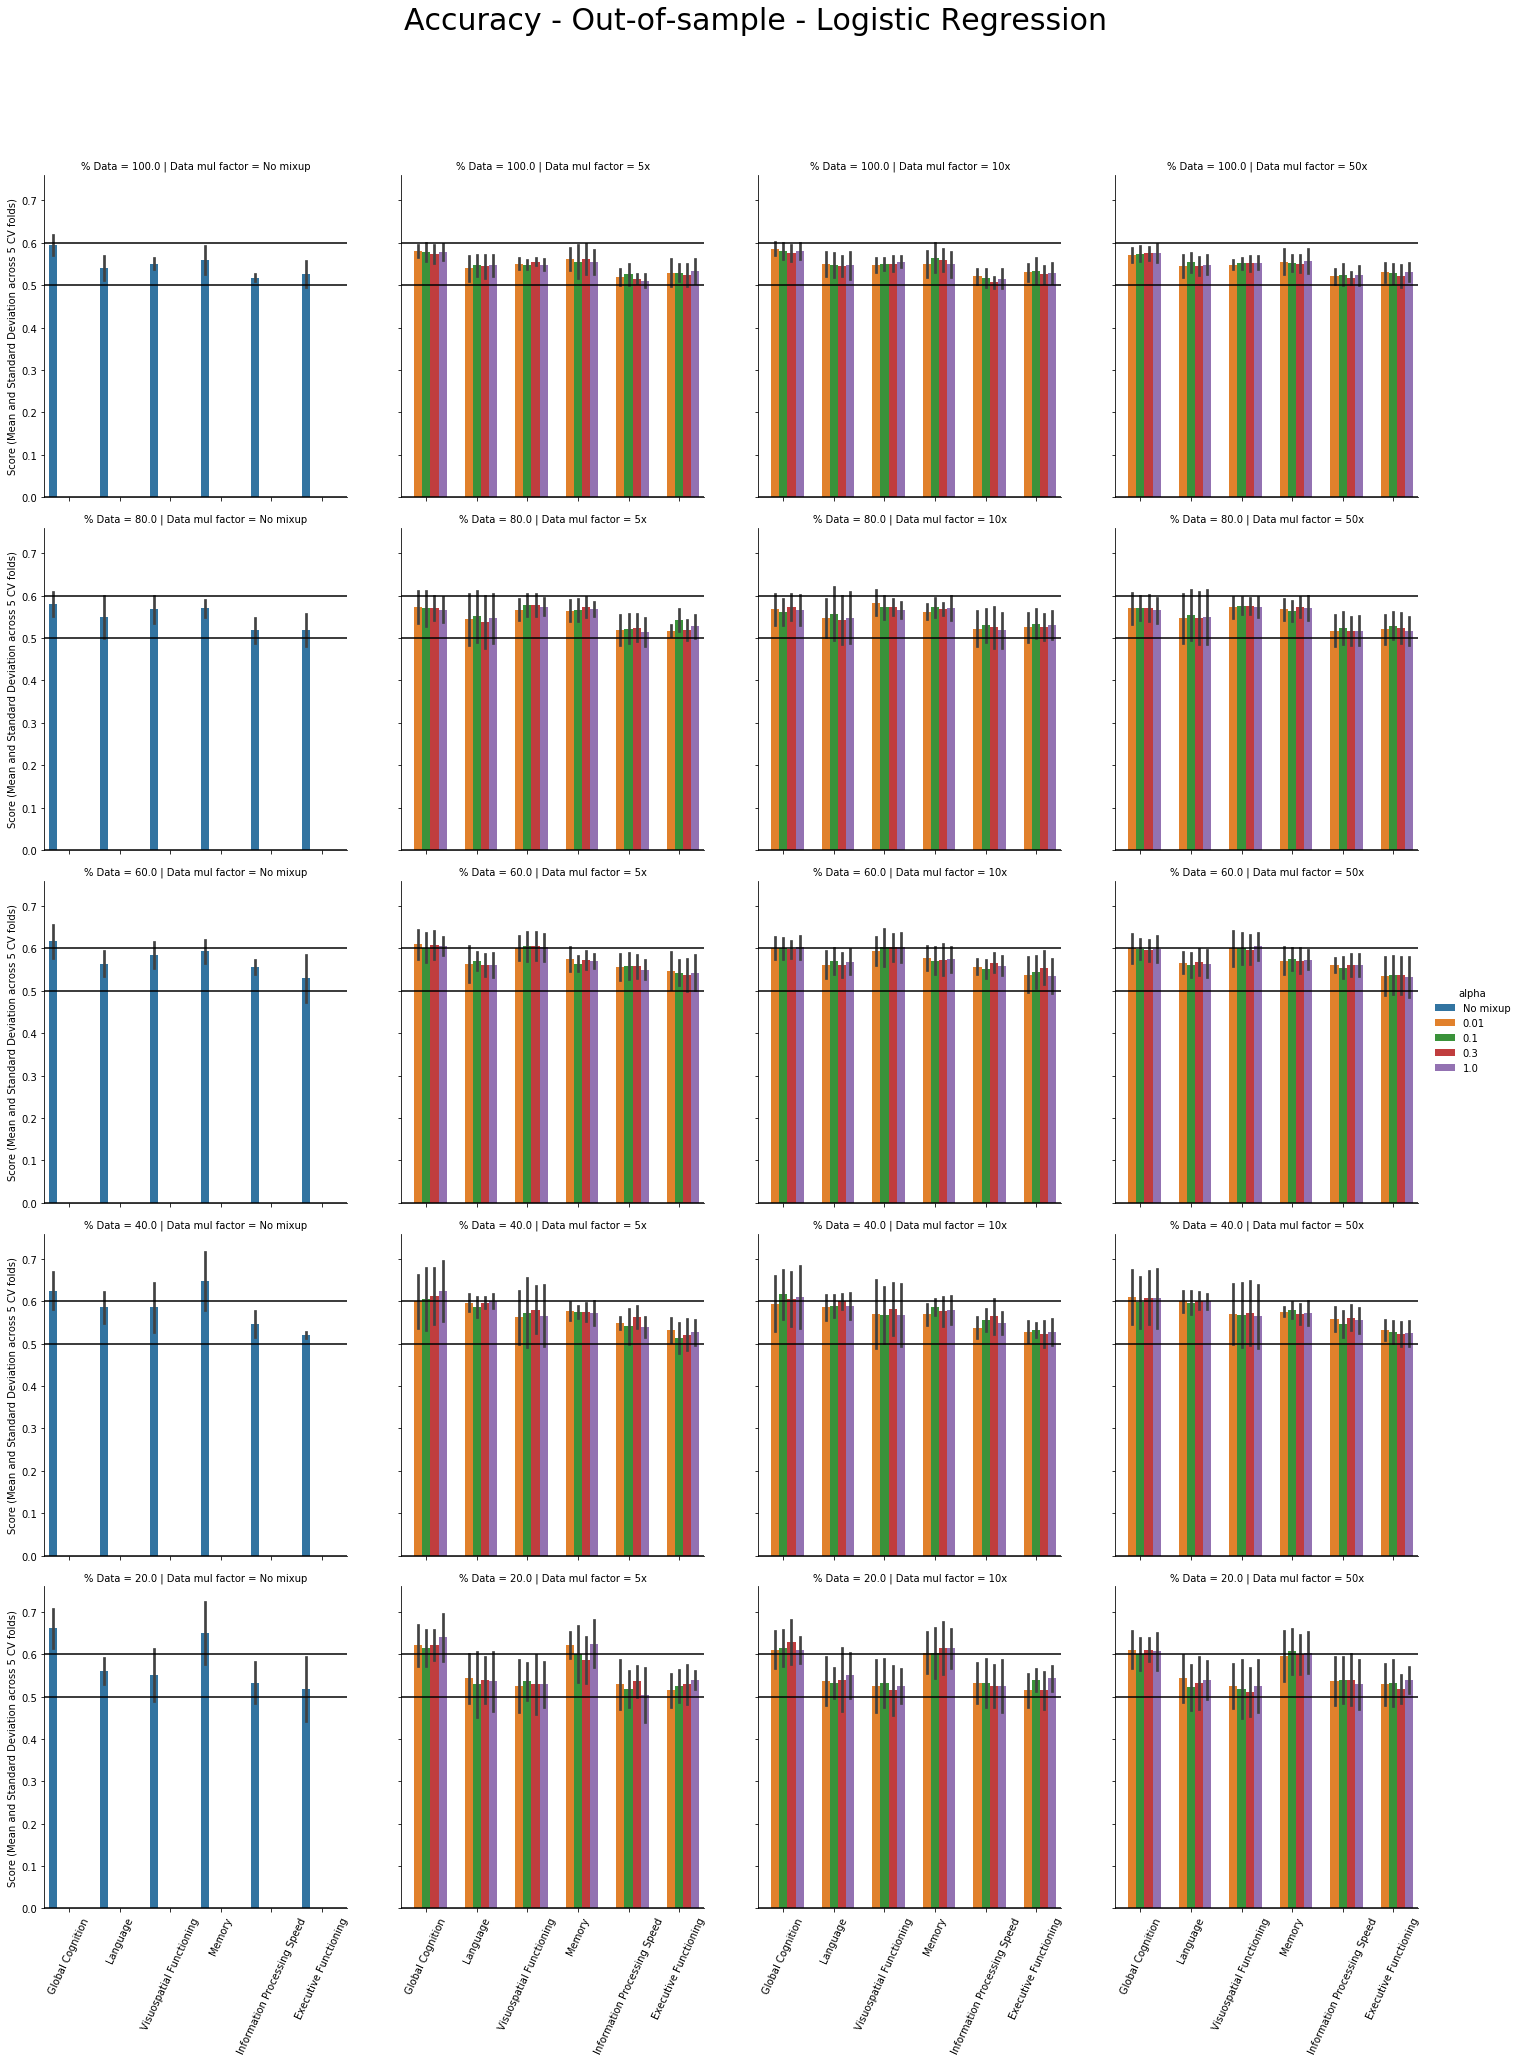

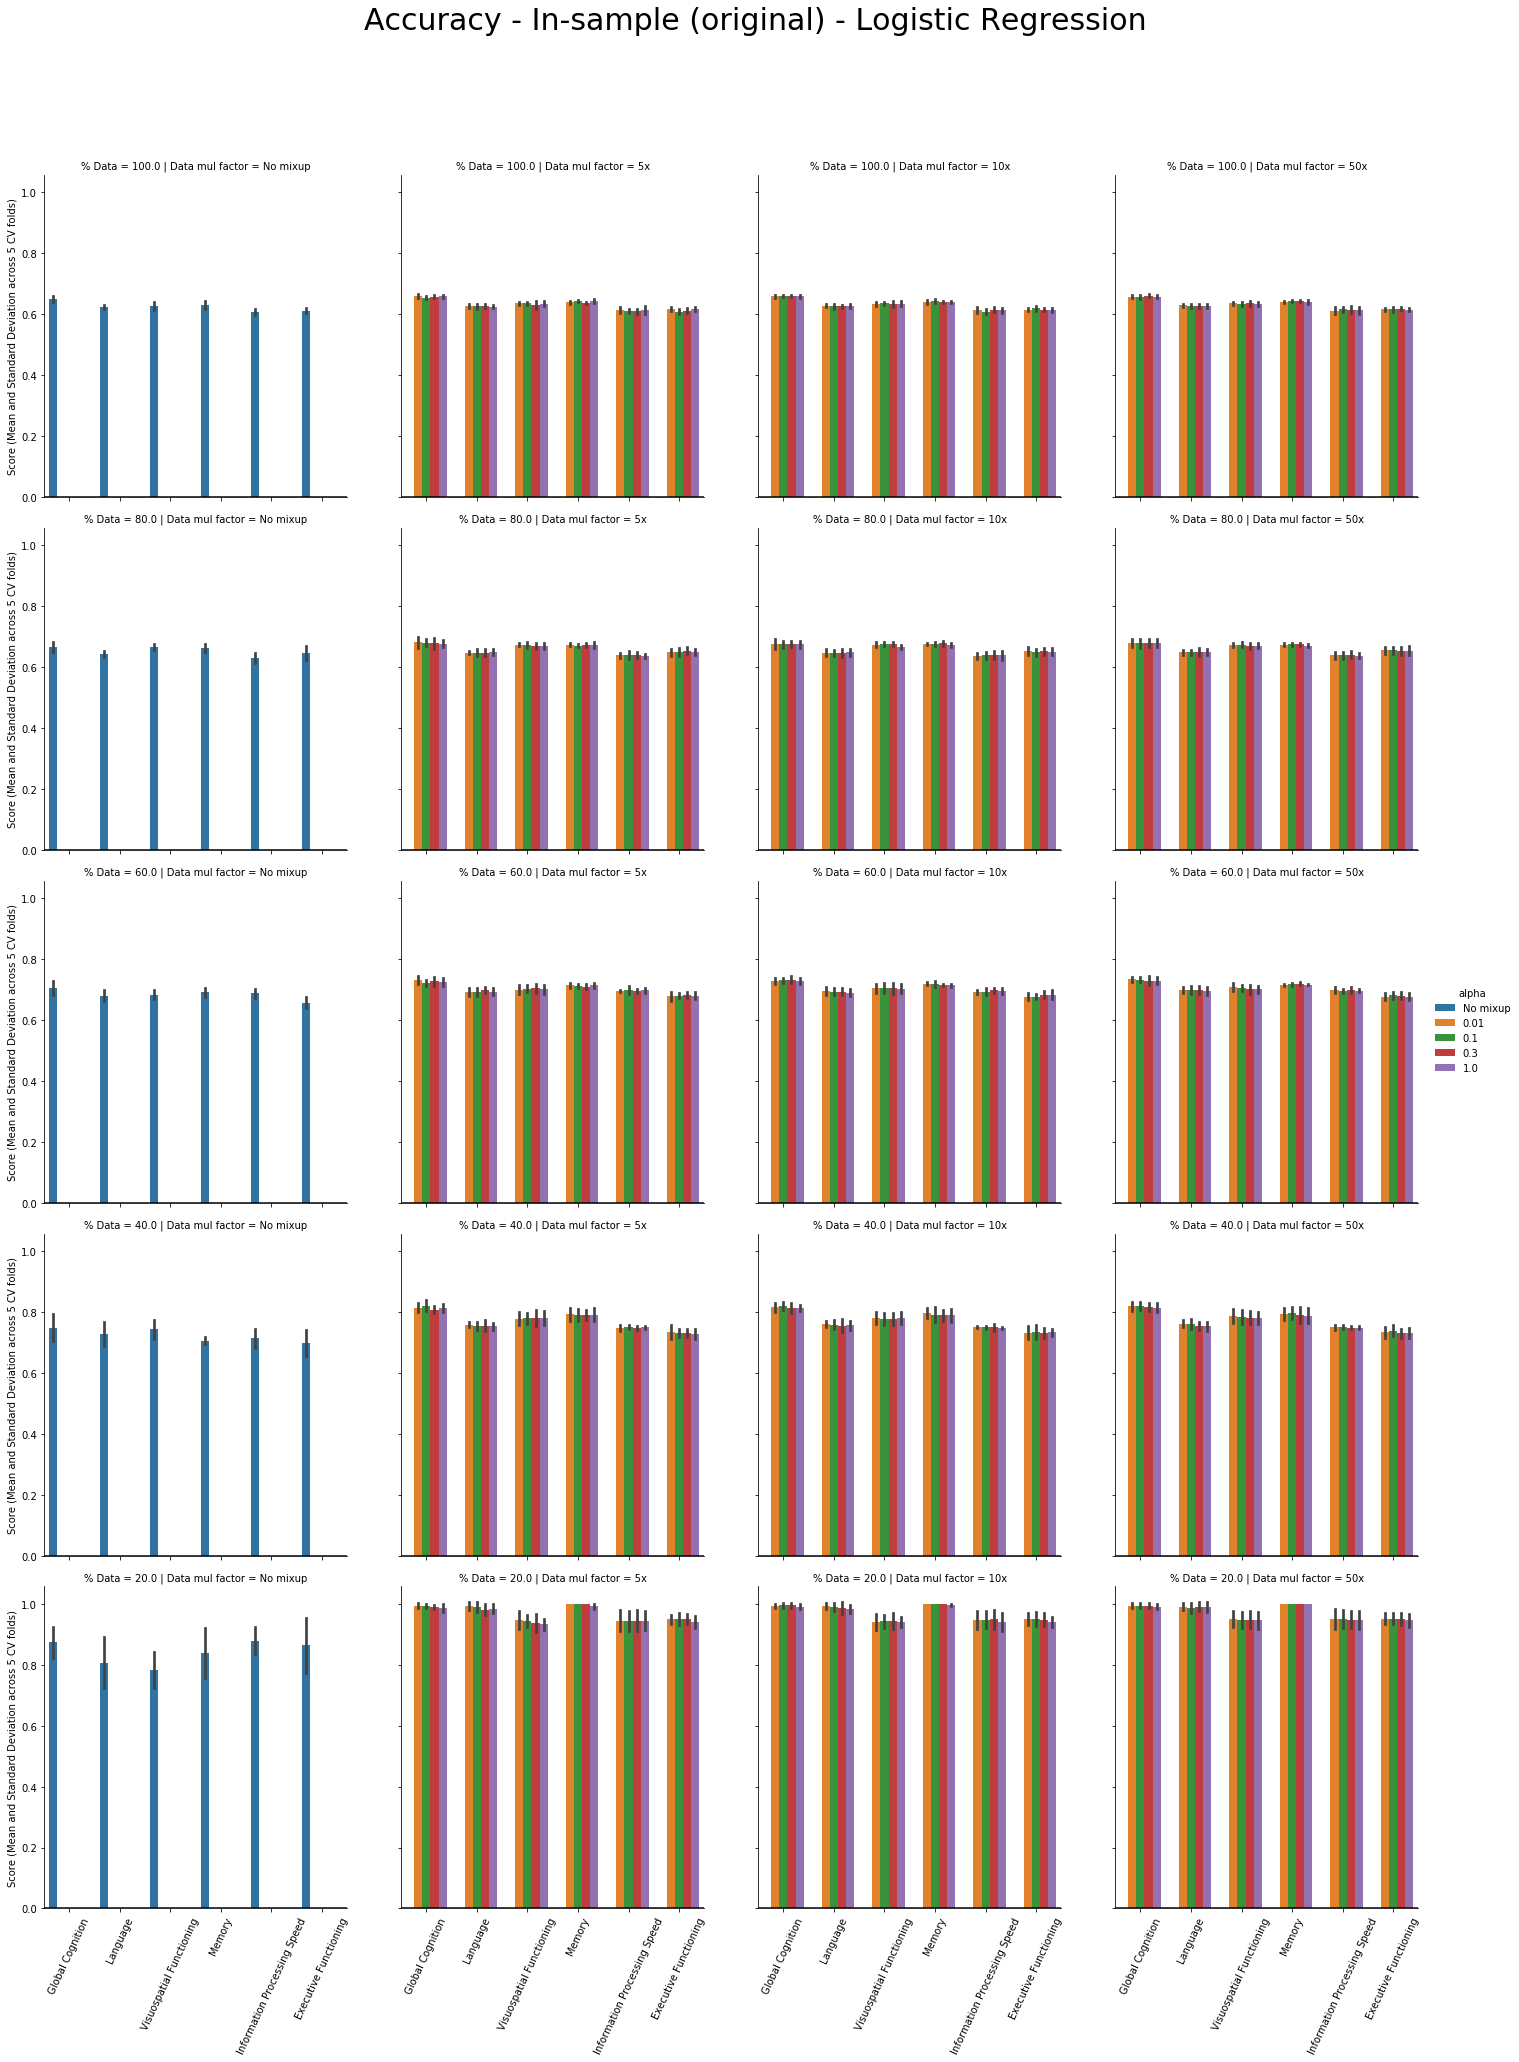

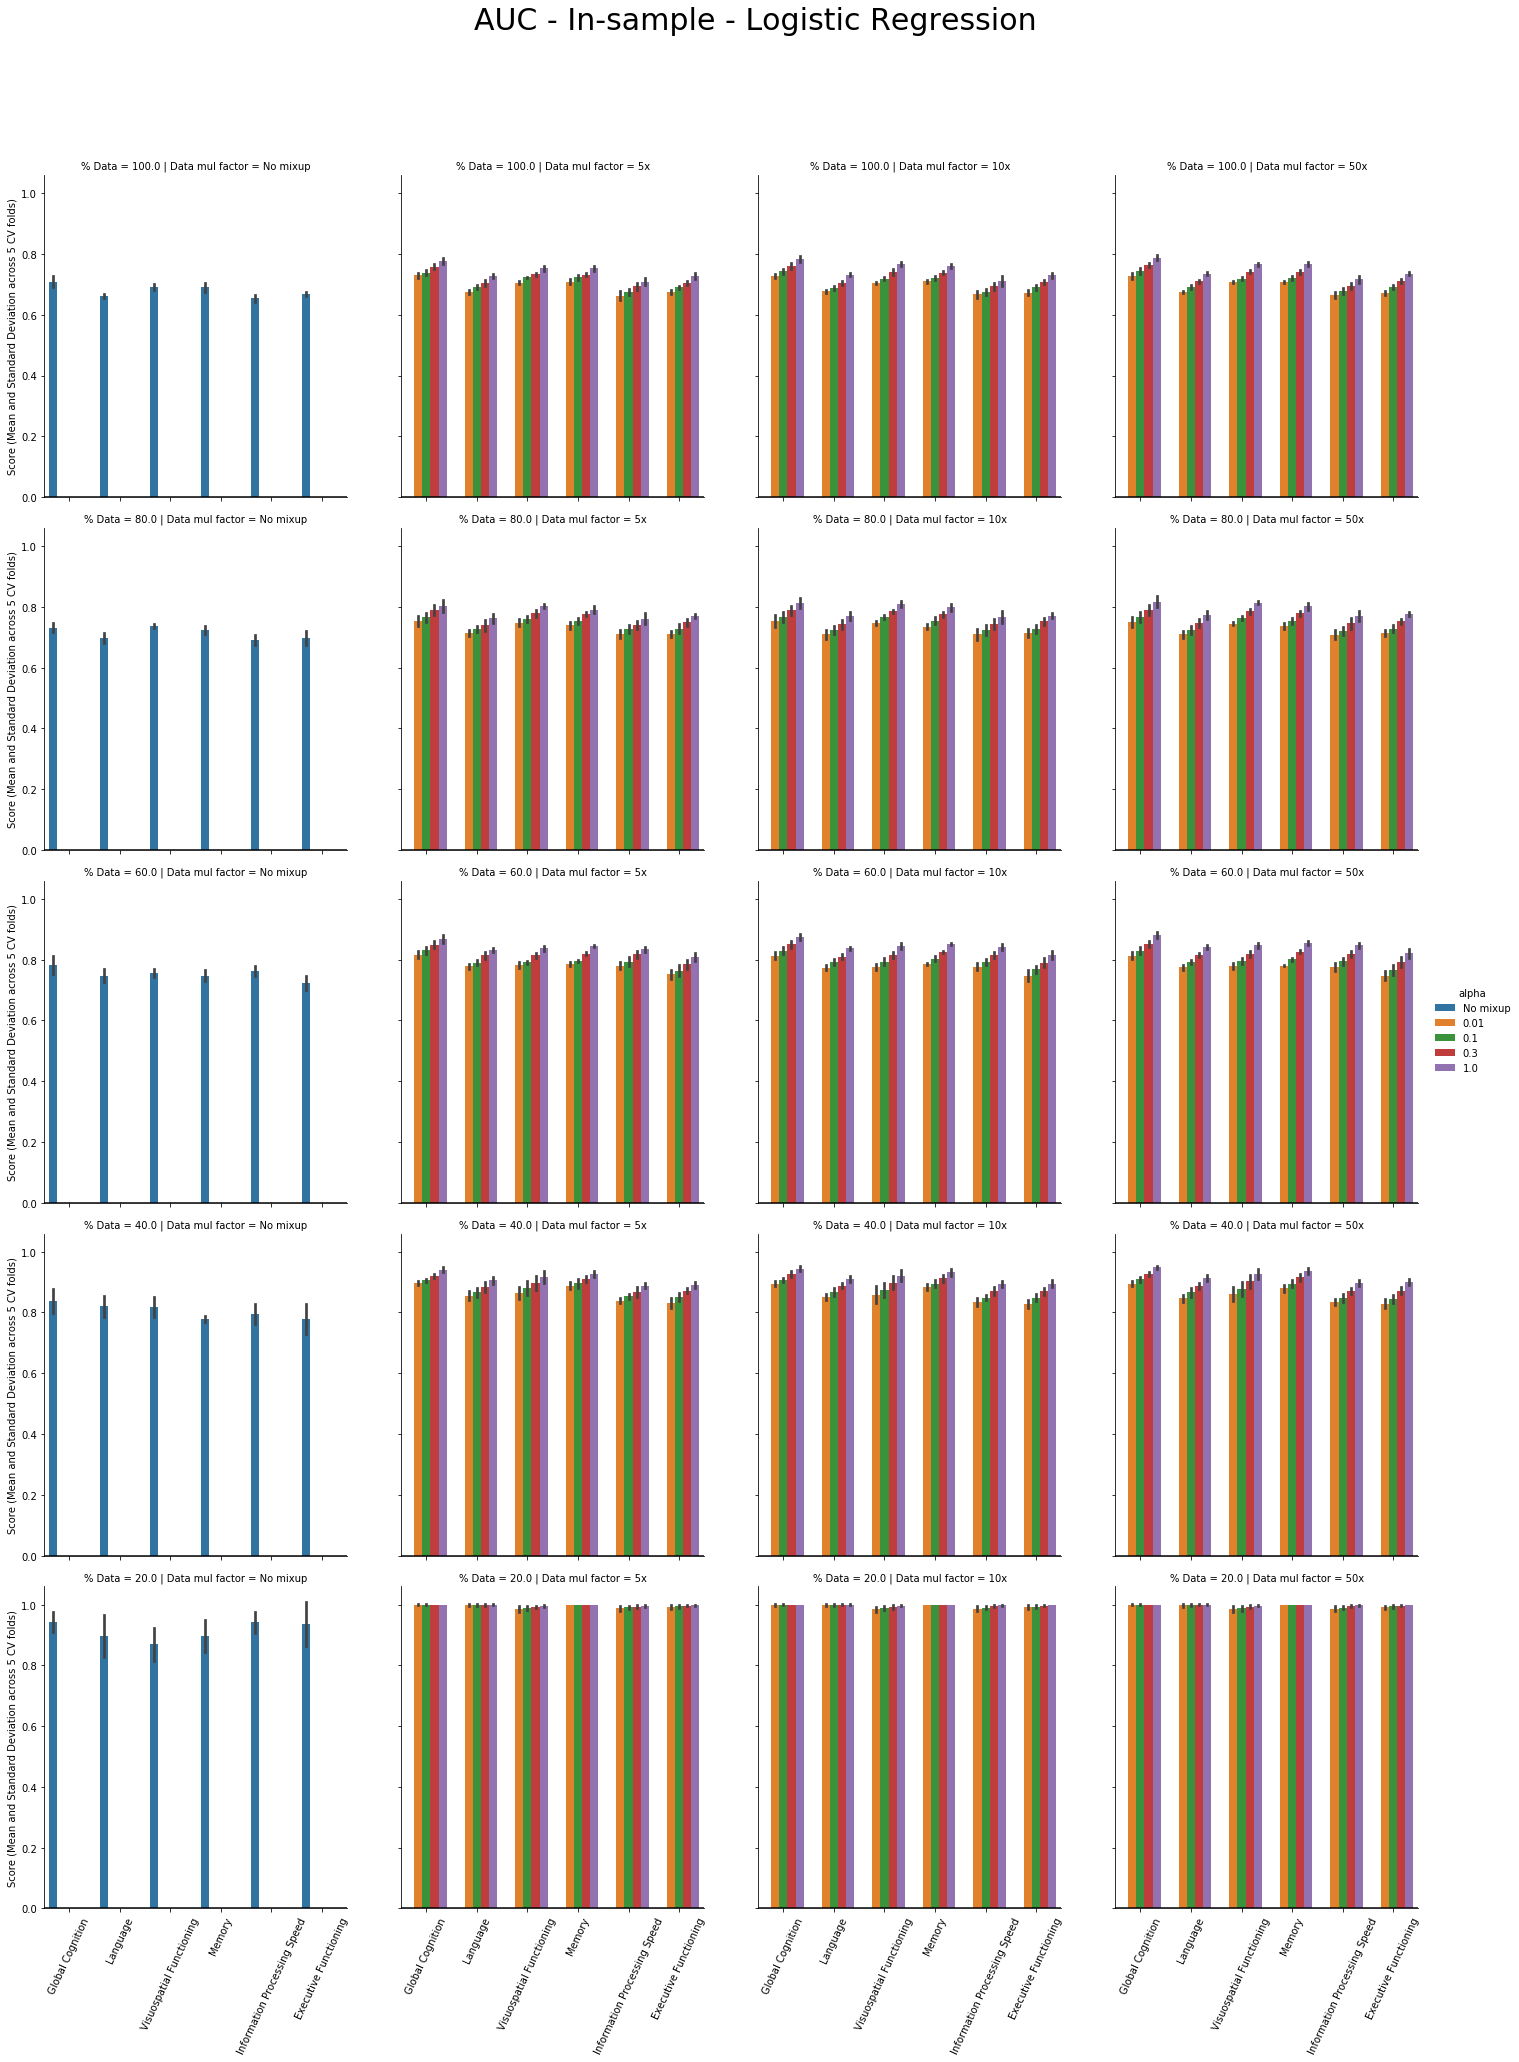

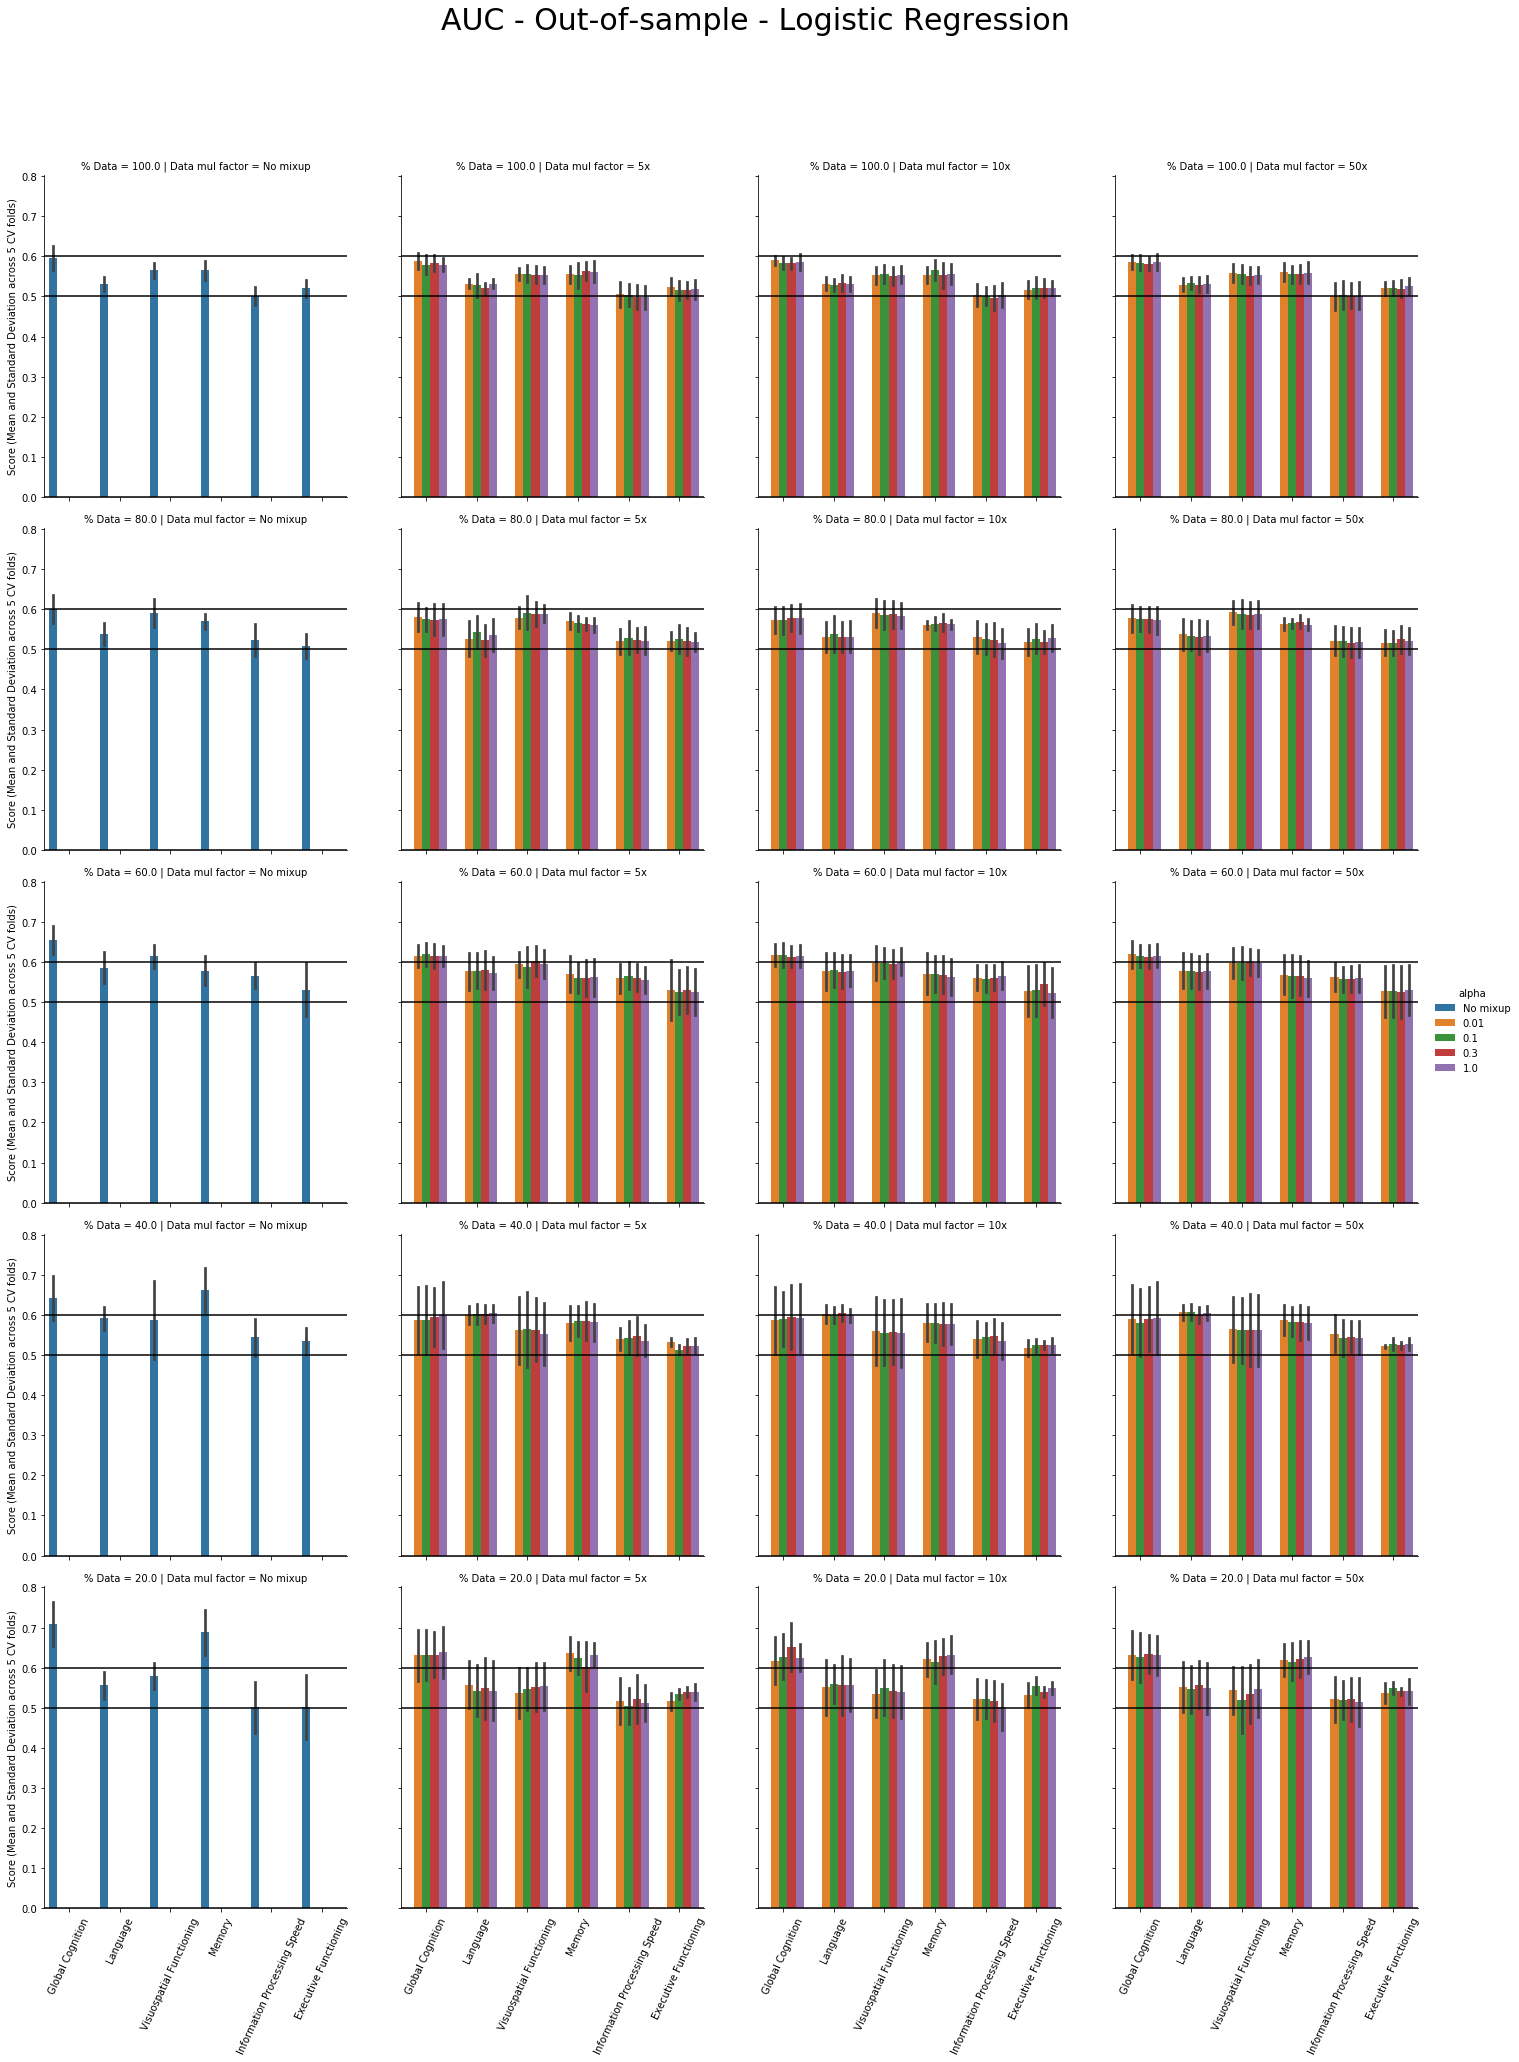

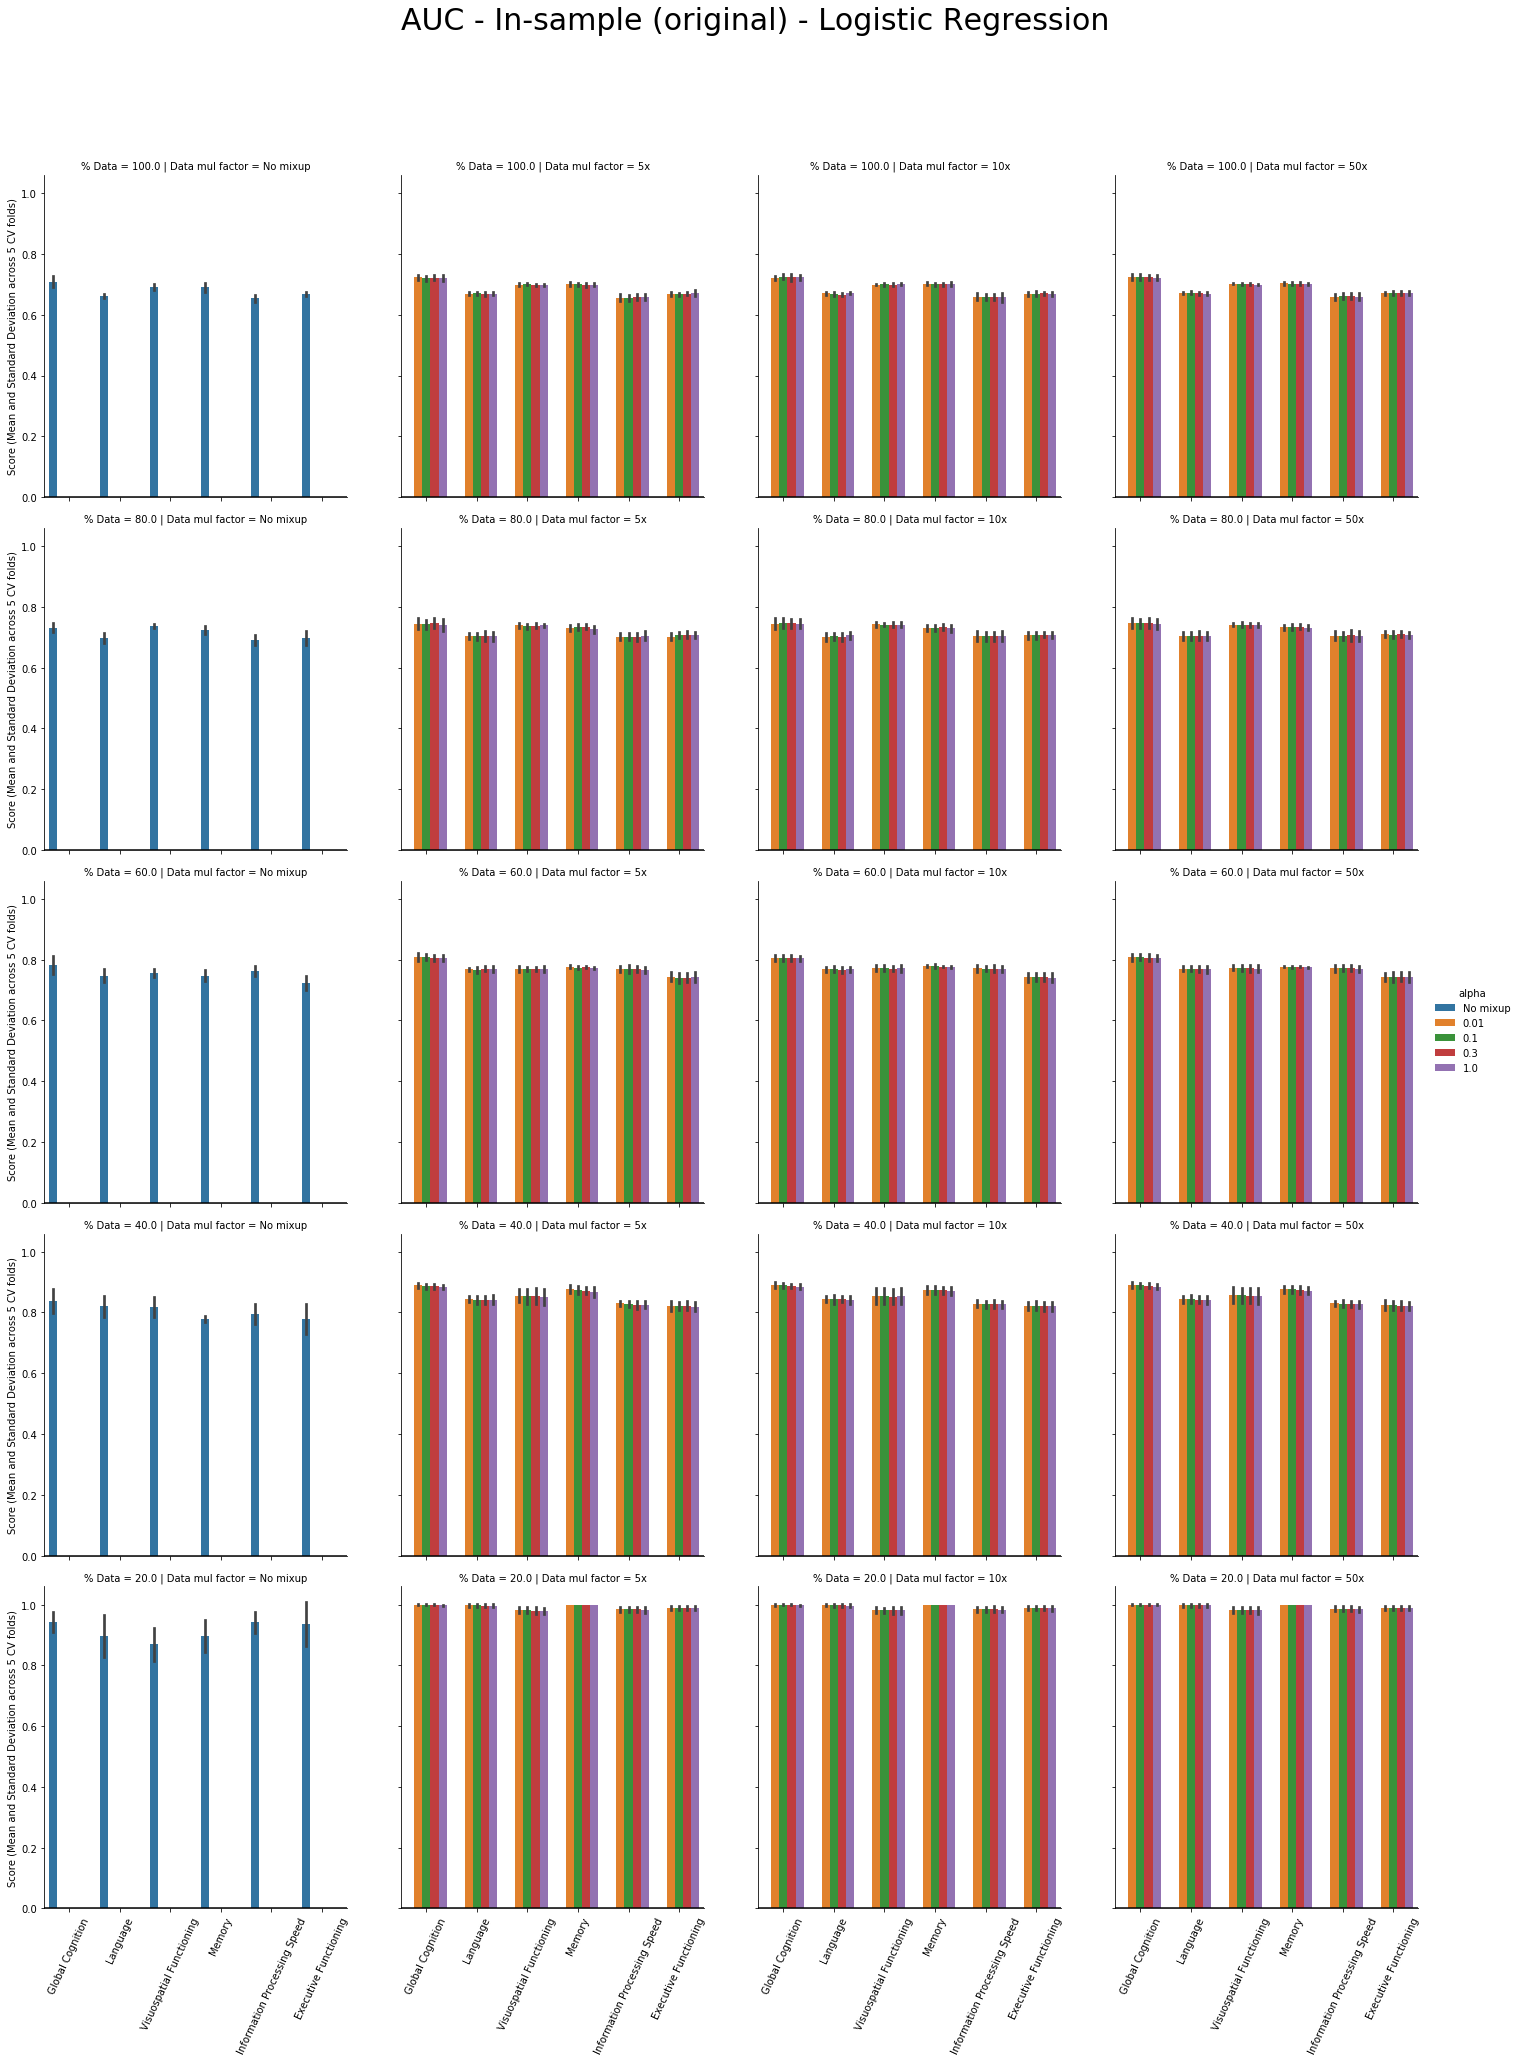

In [50]:
plot_all_scores(logit, col_order=["No mixup", "5x", "10x", "50x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0])

## 2- Random Forest

In [68]:
# rf = pd.read_hdf('results/singleoutput/atlas-llm-mixup-after-log/results_atlas_llm_singleoutput_mixup_after_log_rf_all.h5', key='p', mode='r')
# bprf = pd.read_hdf('results/singleoutput/atlas-llm-mixup-after-log/best_params_atlas_llm_singleoutput_mixup_after_log_rf_all.h5', key='p', mode='r')

rf.to_hdf('results/singleoutput/atlas-llm-mixup-after-log/results_atlas_llm_singleoutput_mixup_after_log_rf_all.h5', key='p', mode='w')
bprf.to_hdf('results/singleoutput/atlas-llm-mixup-after-log/best_params_atlas_llm_singleoutput_mixup_after_log_rf_all.h5', key='p', mode='w')

In [46]:
rflist, bprflist = load_dfs("class/", "*rf*")

[40.] ['No mixup' '5x' '10x'] ['No mixup' 0.01 0.1 0.3 1.0]
[60.] ['No mixup' '5x' '10x'] ['No mixup' 0.01 0.1]
[80.] ['5x' '10x'] [0.01]
[100.] ['No mixup' '5x' '10x'] ['No mixup' 0.01]
[60.] ['5x' '10x'] [0.3 1. ]
[80.] ['5x' '10x'] [0.1]
[100.] ['5x' '10x'] [0.1]
[80.] ['5x' '10x'] [0.3]
[100.] ['5x' '10x'] [0.3]
[80.] ['5x' '10x'] [1.]
[100.] ['5x' '10x'] [1.]
[20.] ['No mixup' '5x' '10x'] ['No mixup' 0.01 0.1 0.3 1.0]
[80.] ['No mixup'] ['No mixup']
13 13


In [43]:
# bprflist[13]

In [47]:
rf = pd.concat(rflist, ignore_index=True)
bprf = pd.concat(bprflist, ignore_index=True)

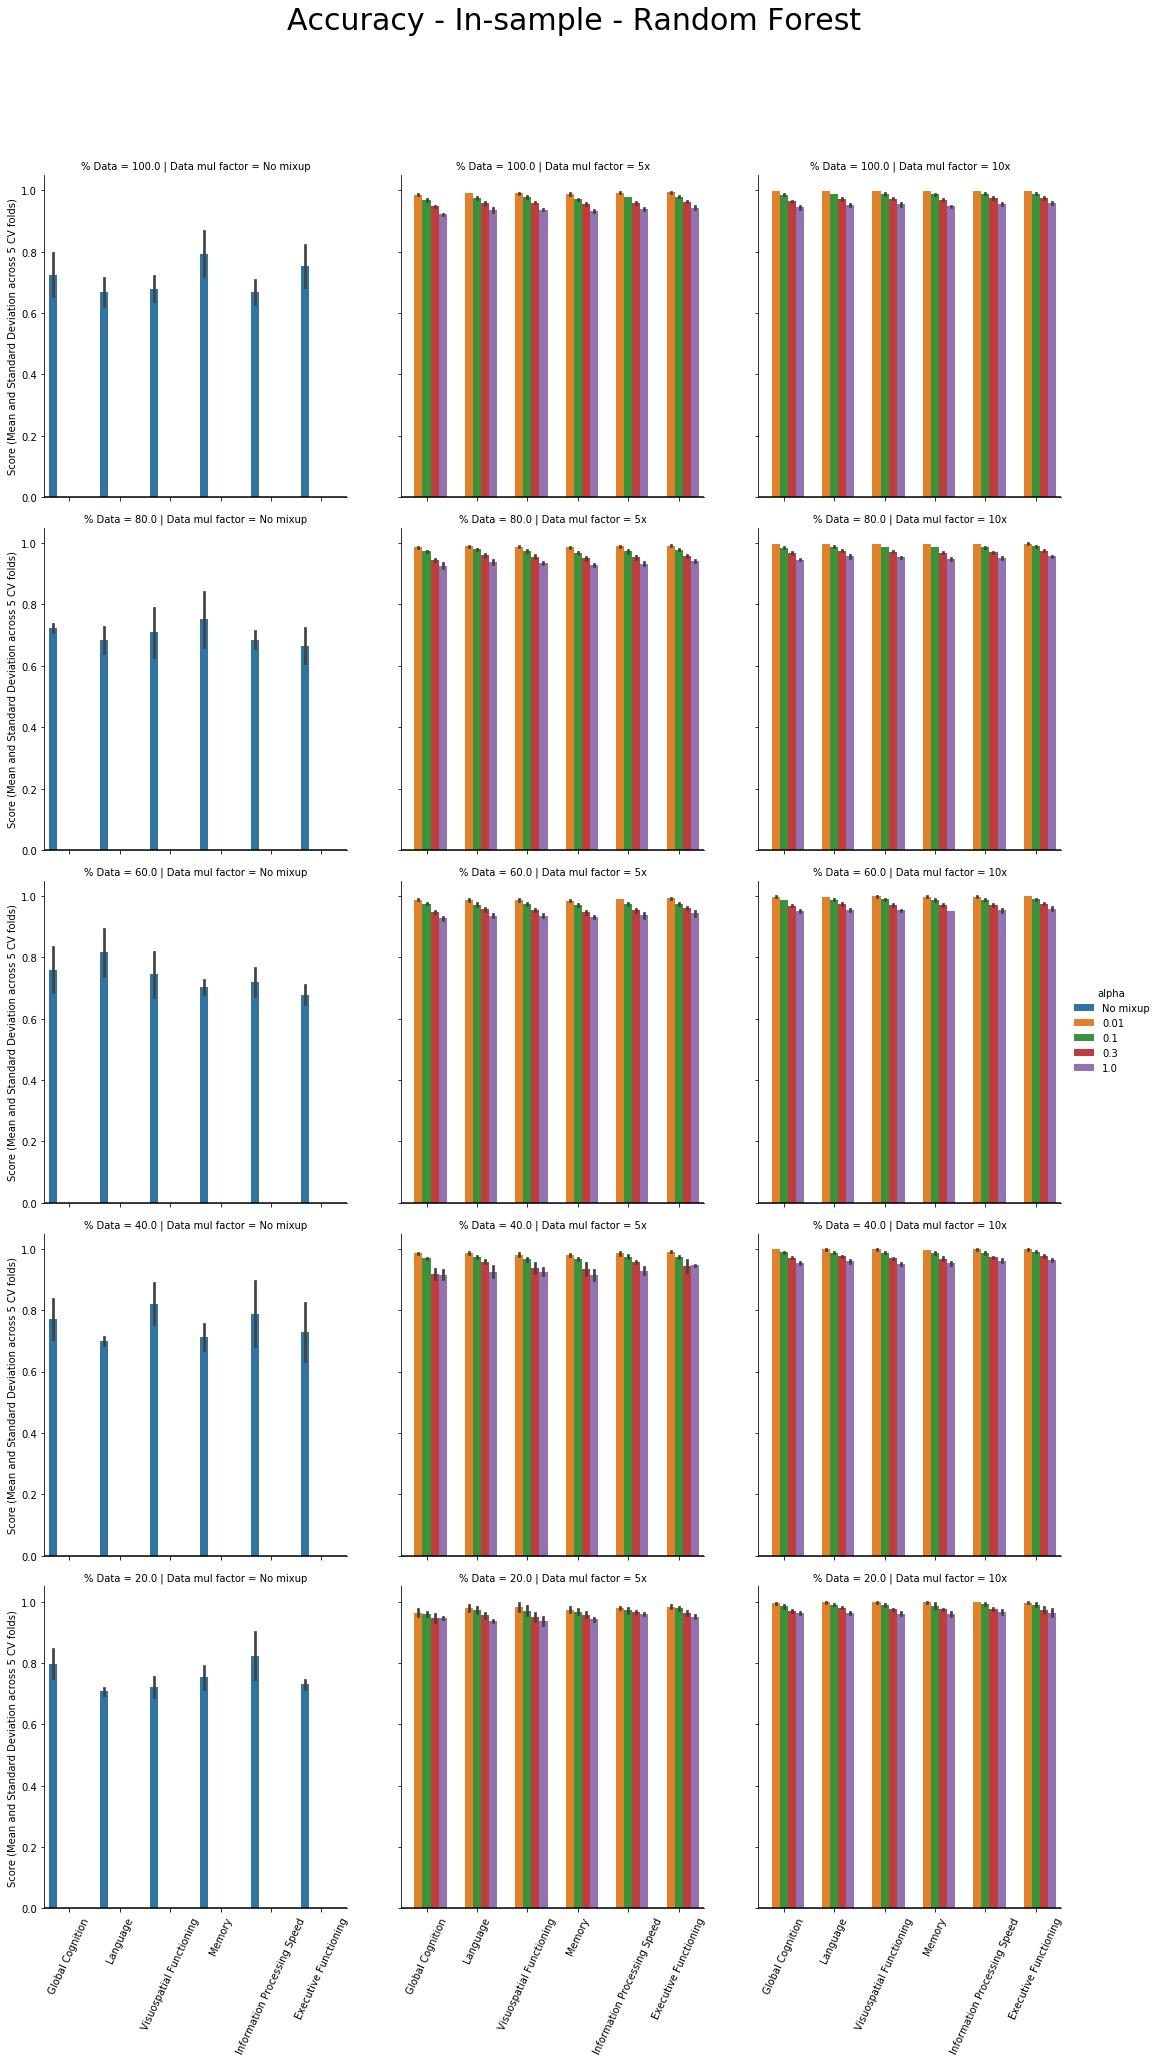

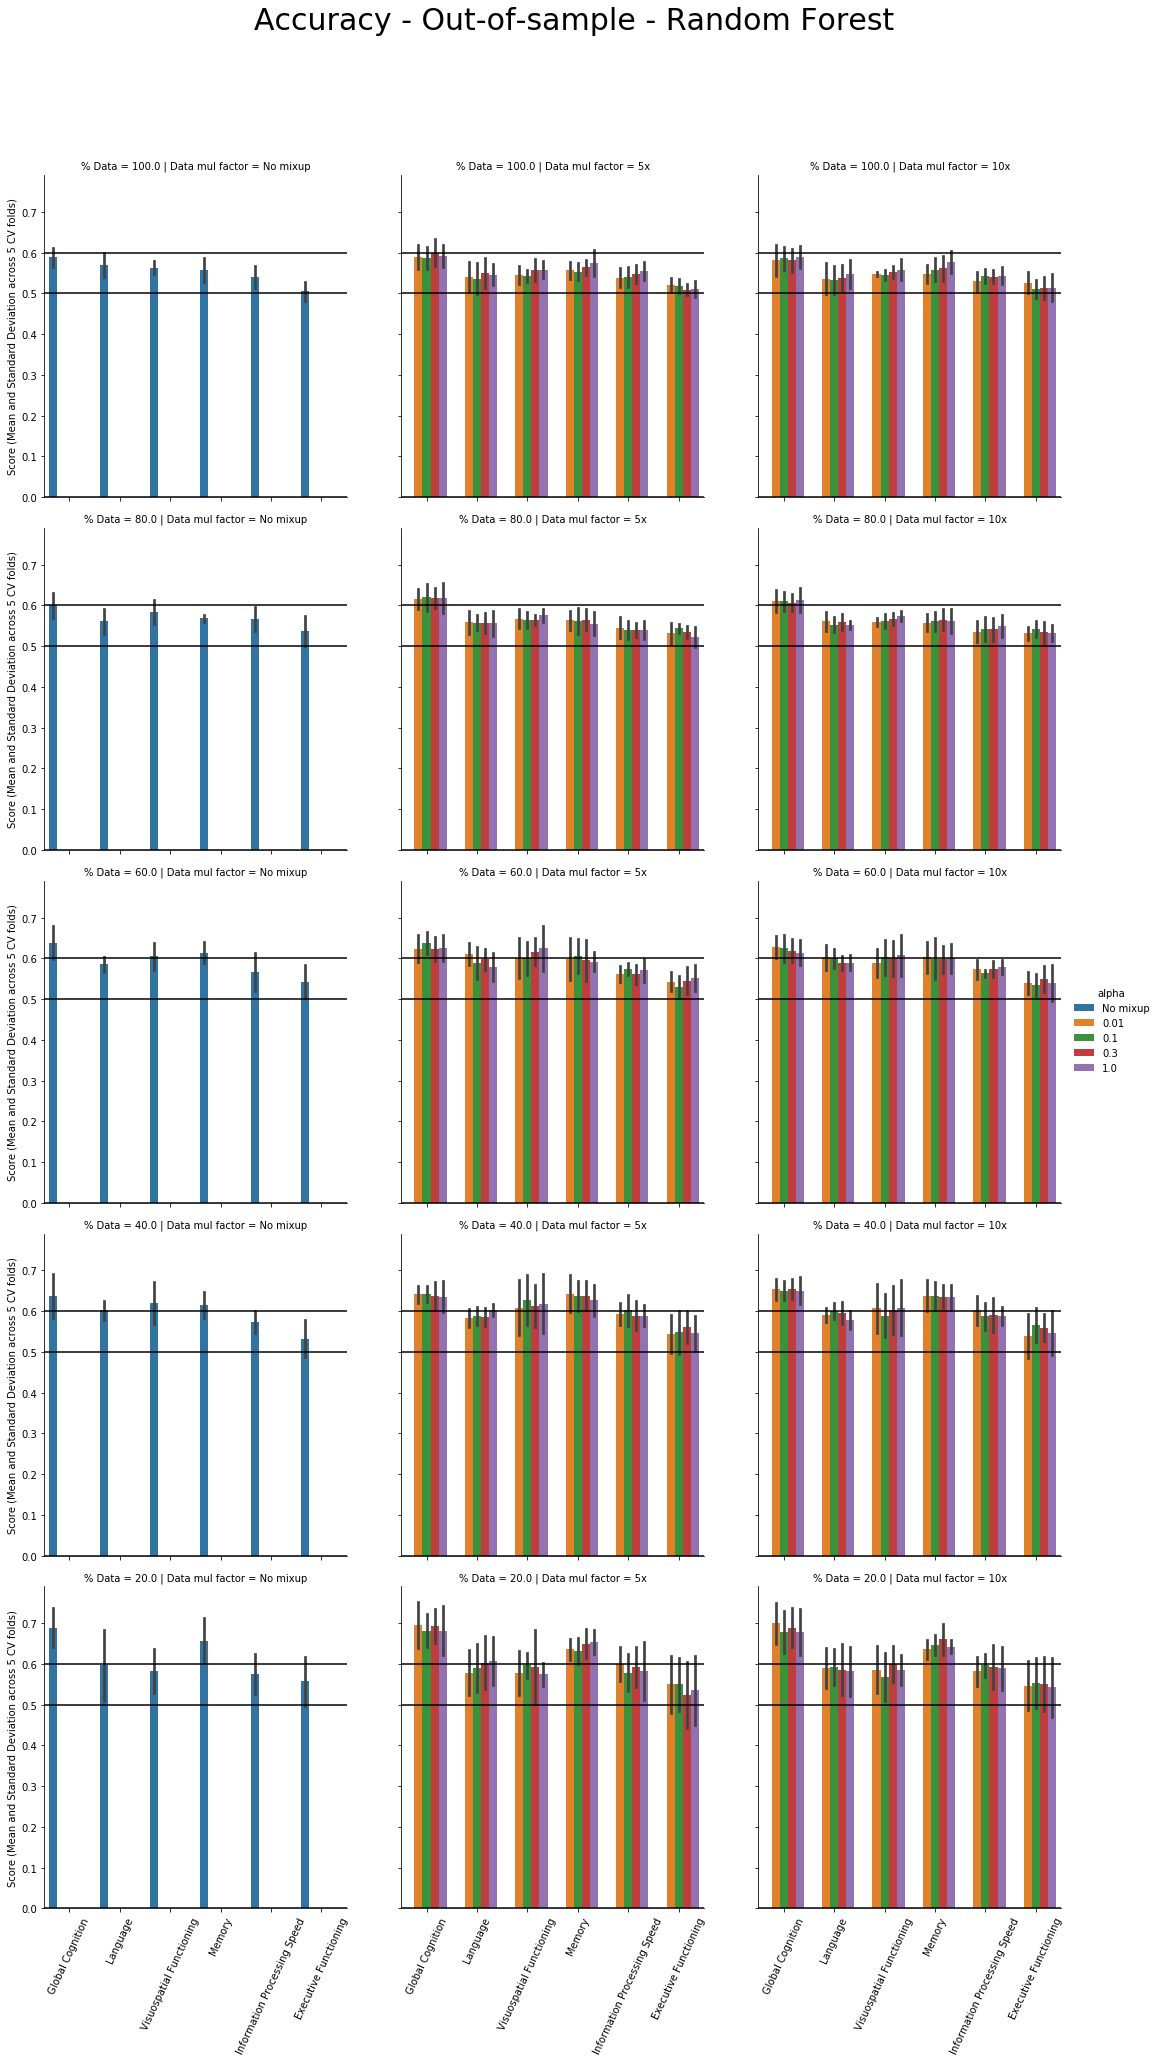

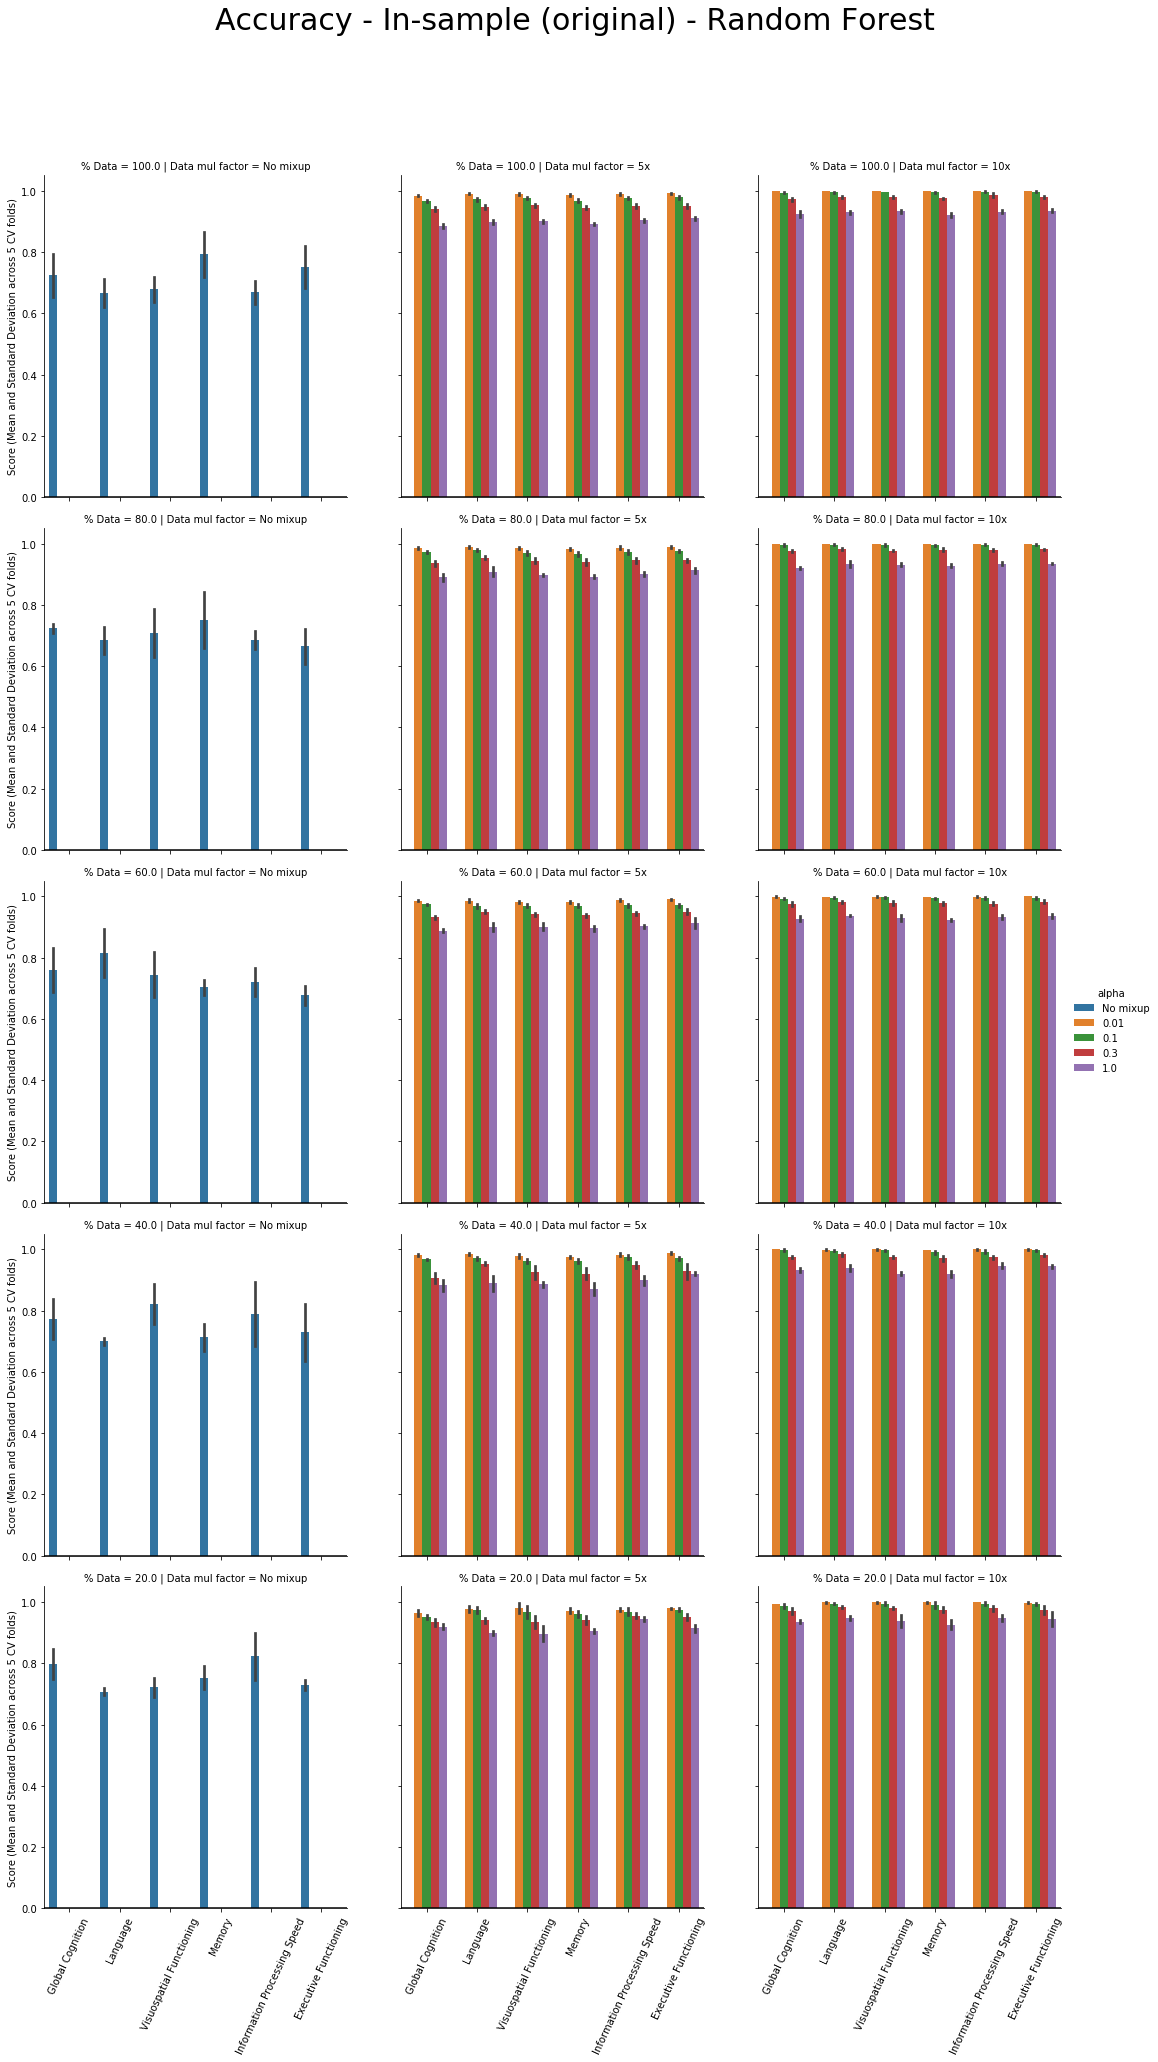

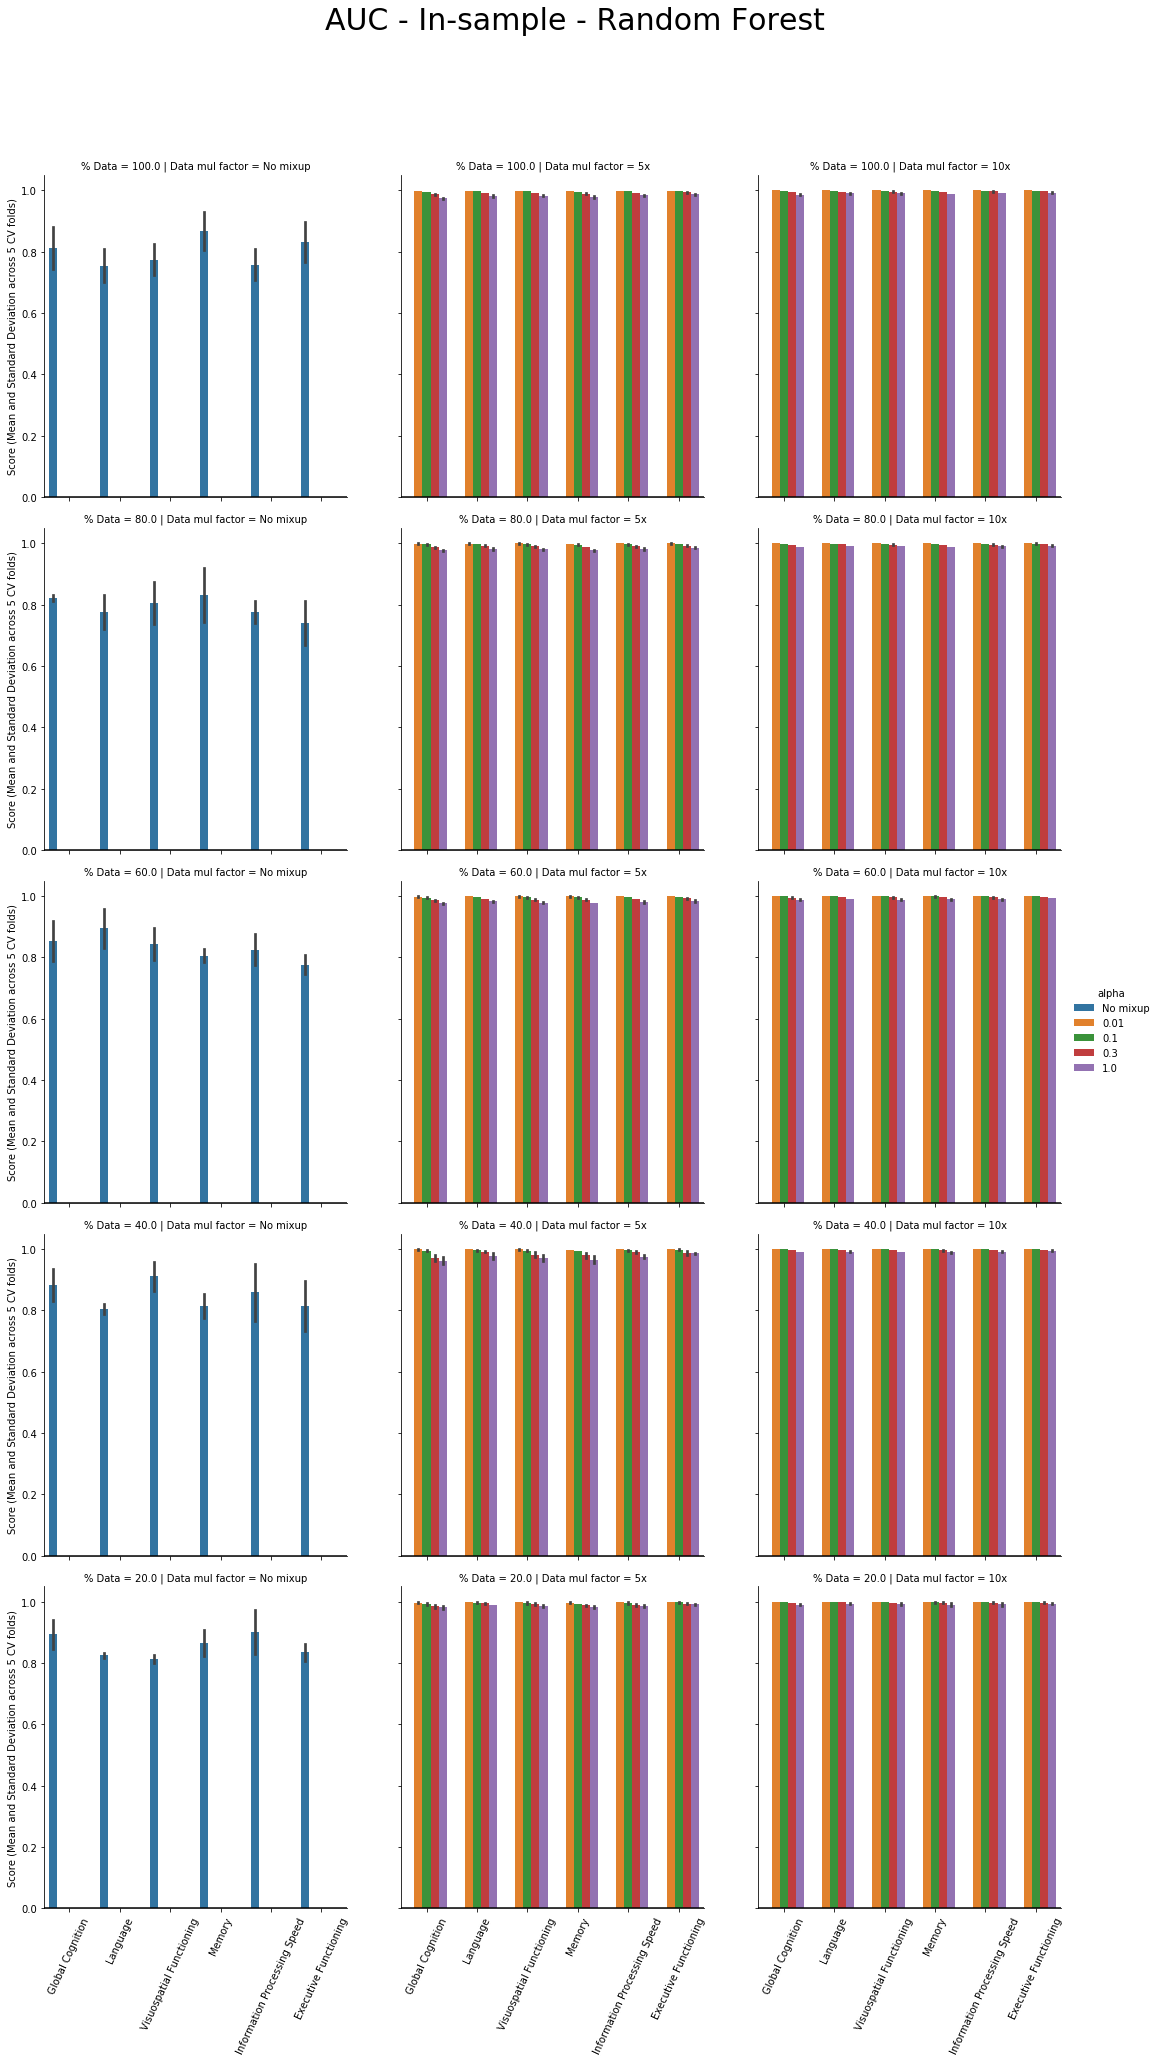

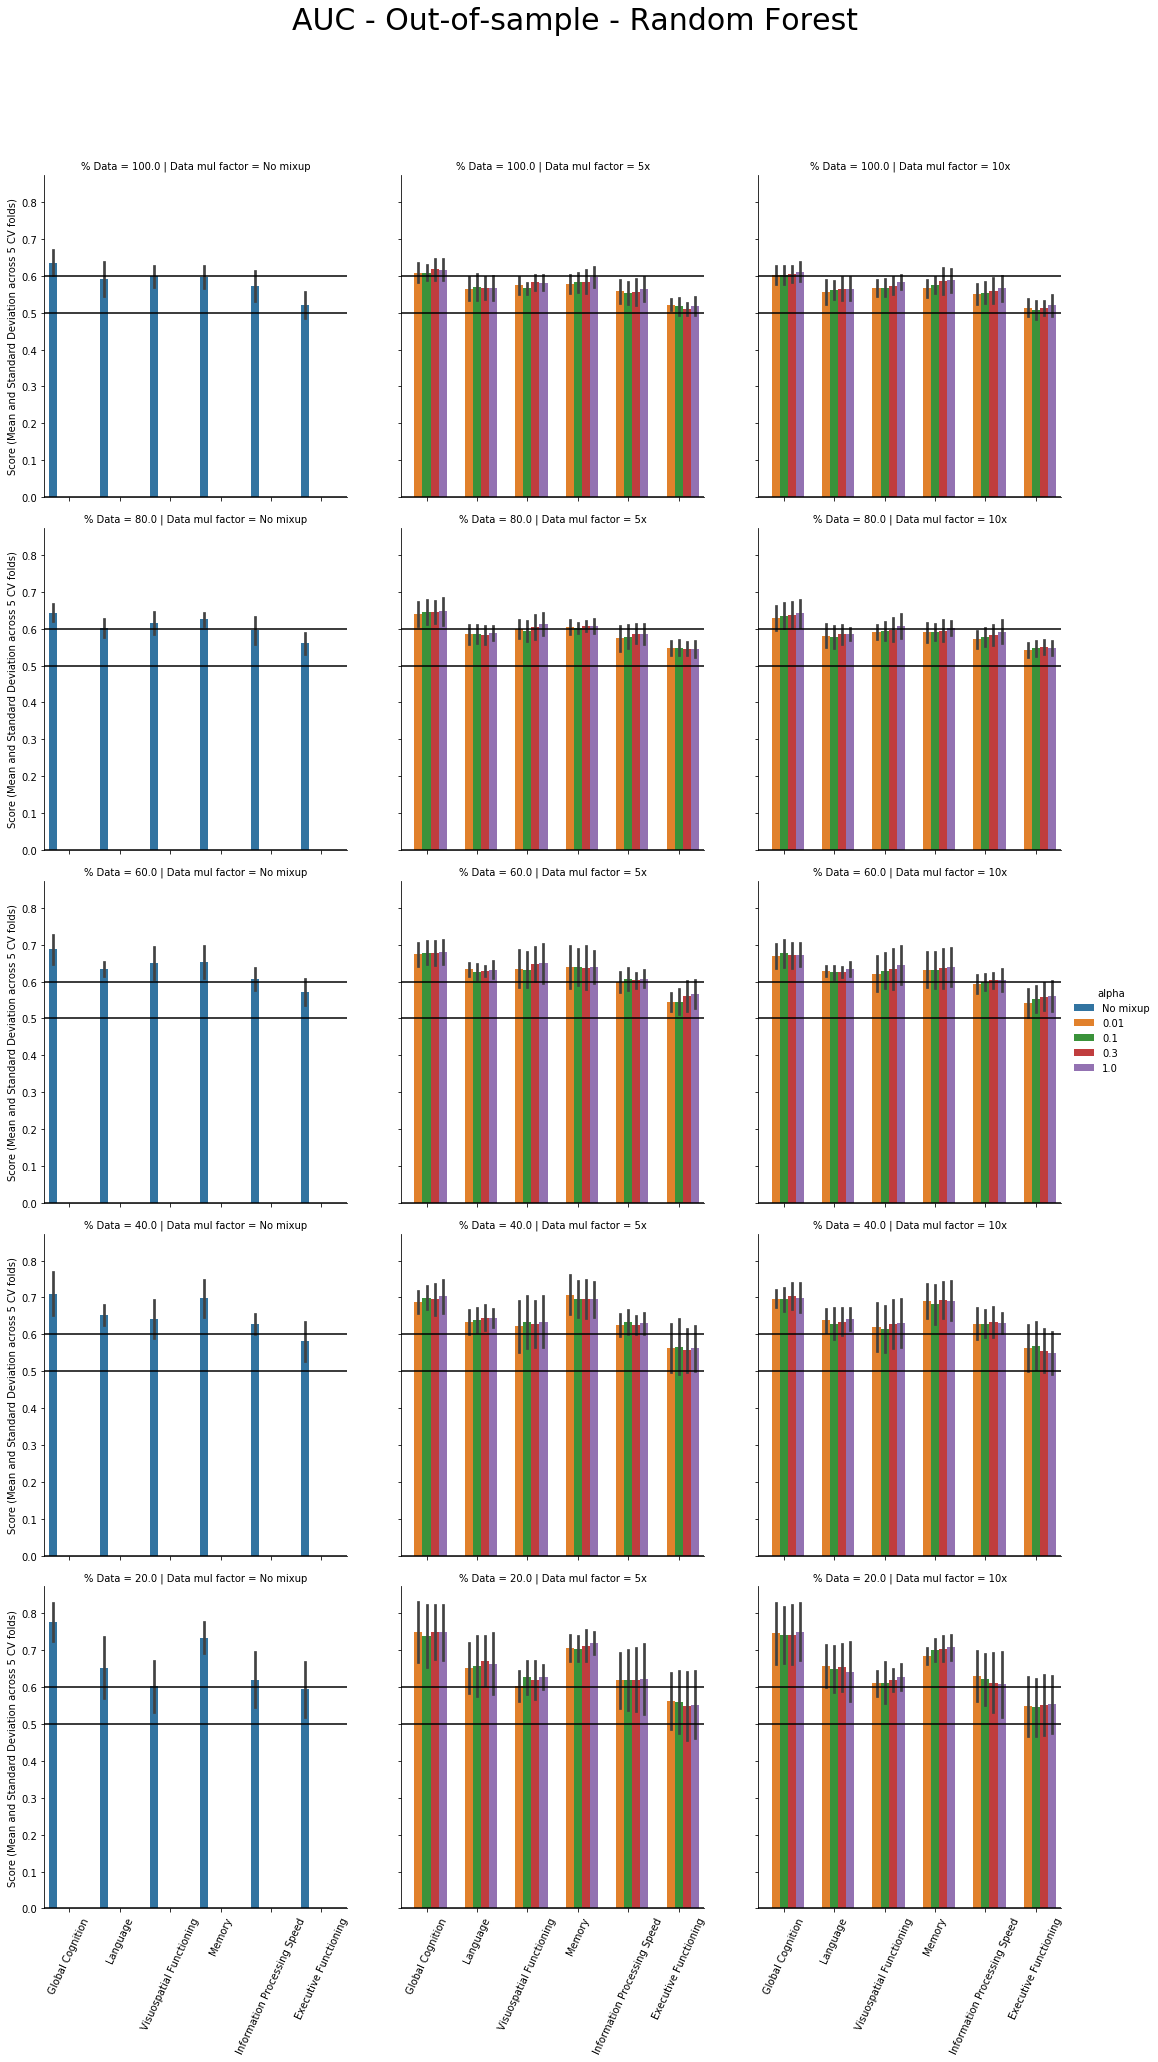

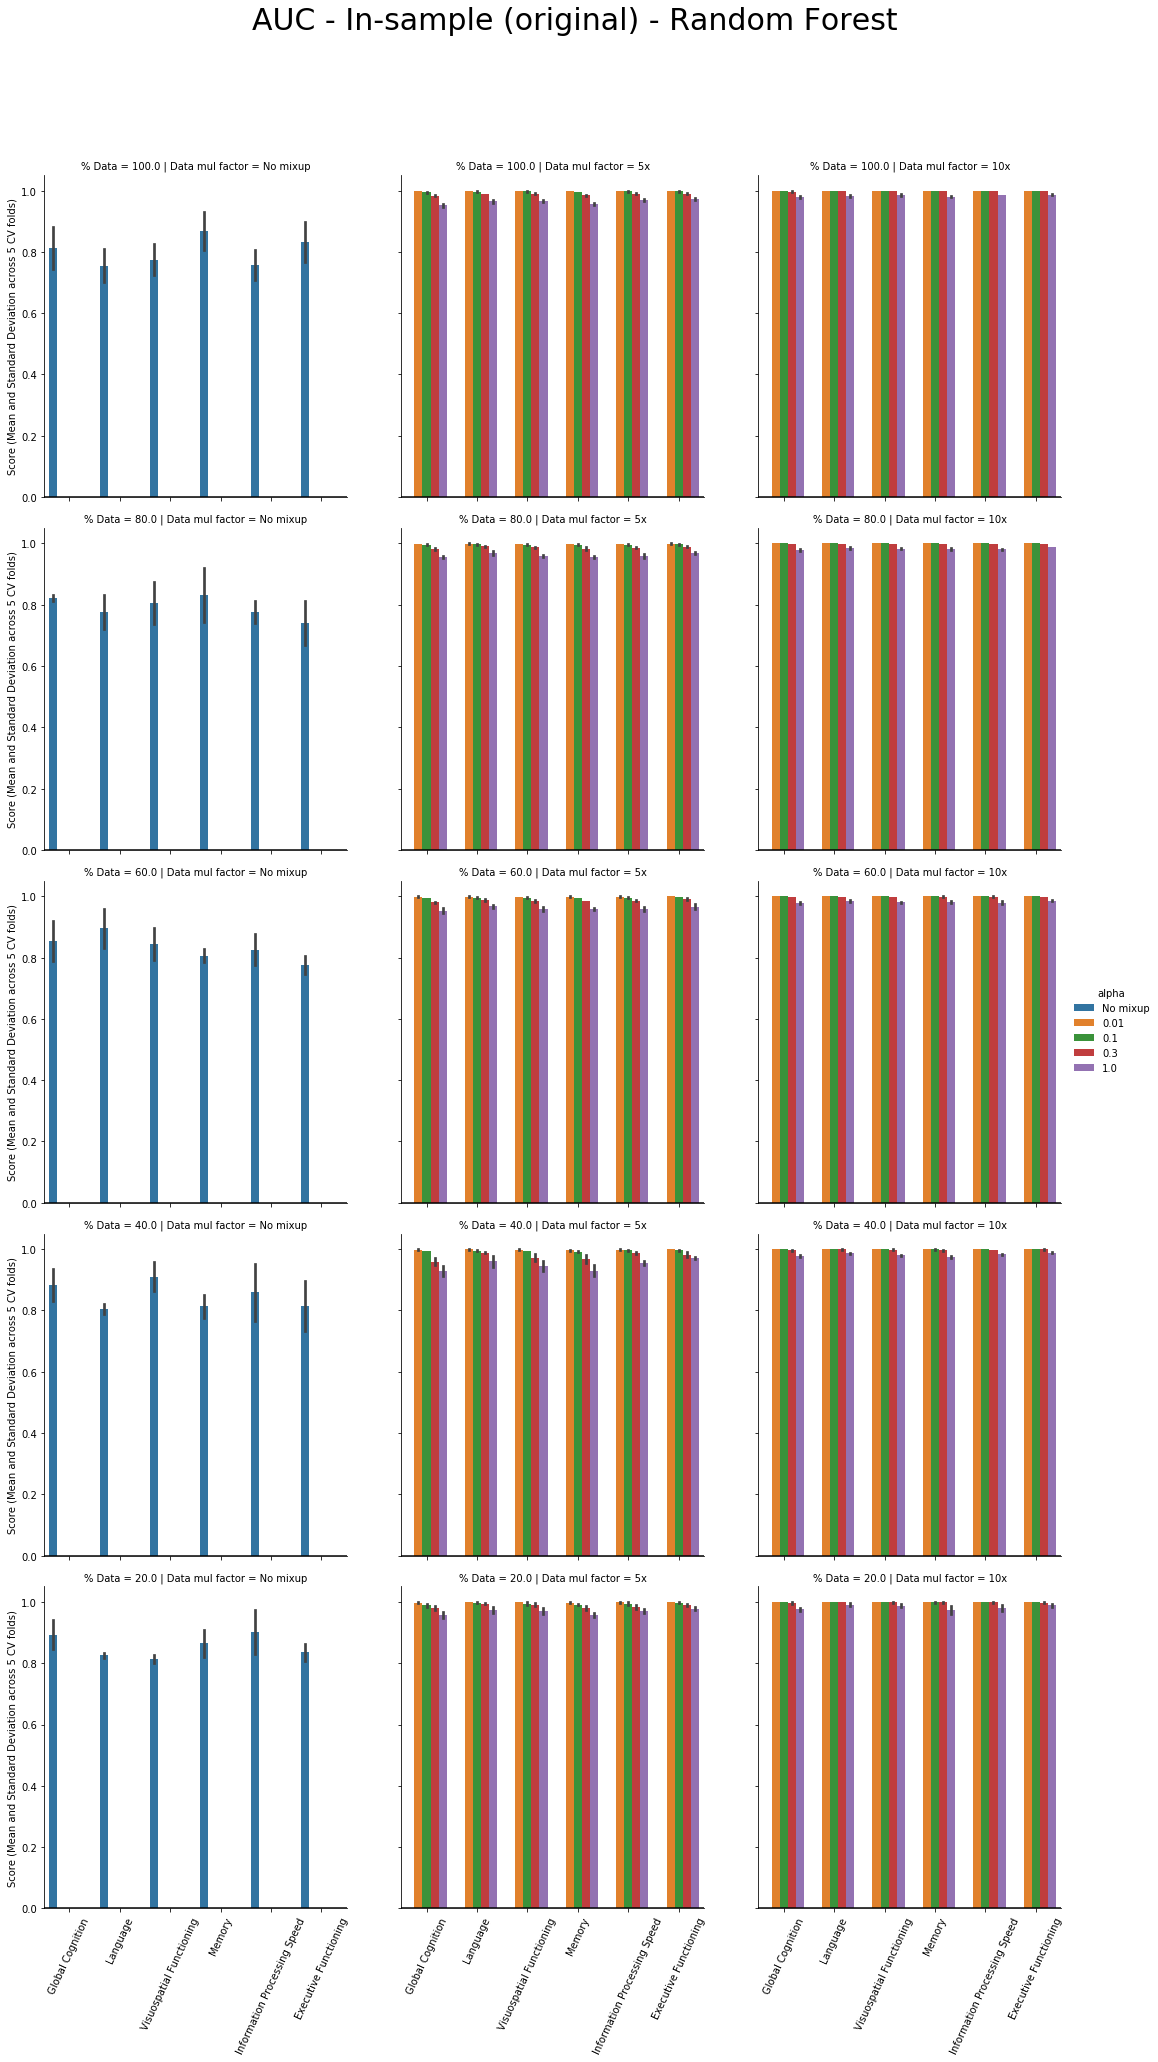

In [51]:
plot_all_scores(rf, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0])